In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sbn
import datetime
import matplotlib as plot
import matplotlib.pyplot as plt
from IPython.display import display
import panel
panel.extension('tabulator')
import hvplot.pandas
from sklearn.ensemble import RandomForestClassifier as rfc

In [3]:
# Estudio y analisis del nivel de cisterna

In [4]:
# Data import 
train_df = pd.read_csv("resources/Historico agua potable2021_30032022.csv", delimiter=";")
#train_consumo = pd.read_csv("resources/Historial de Consumos Agua.csv", delimiter="," , thousands=".")
# train_test = pd.read_csv("resources/Historial_Agua.csv")
print(train_df.shape)

(454, 8)


In [5]:
# **********************************************************************************
# *************** COMIENZA EL ANALISIS DEL DATASET DE CONSUMO DE AGUA **************

display(train_df.head(5))

train_df['Nivel_Cisterna'].isnull().values.any()
print(train_df.shape)
# print(train_df.loc[[112]])

Fecha Ingreso_m3/h Egreso_m3/h  Prom_Ingreso_Hora  Prom_Egreso_Hora  \
0  01/01/2021       137,64      127,94               3303              3068   
1  02/01/2021       126,64      155,17               3039              3725   
2  03/01/2021       130,55      125,14               3133              3004   
3  04/01/2021       134,23      141,42               3221              3391   
4  05/01/2021       137,88      134,14               3309              3219   

  Humedad Temperatura Nivel_Cisterna  
0    34,8        29,6        1456,18  
1    33,6        31,7         1369,9  
2    40,3        29,4        1408,93  
3    41,4        31,9        1392,13  
4    50,1        29,8        1370,95

(454, 8)


In [6]:
#train_df.apply(pd.to_numeric, errors='ignore') aplica a todas las columnas, pero si da error, chauu
# Cambiando los tipos de datos en las columns Nivel_Cisterna objet to float
train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].astype(str)
train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].str.replace(',','.')
train_df['Nivel_Cisterna'] = train_df['Nivel_Cisterna'].astype(float)


train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].astype(str)
train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].str.replace(',','.')
train_df['Prom_Ingreso_Hora'] = train_df['Prom_Ingreso_Hora'].astype(float)

print(train_df['Prom_Ingreso_Hora'])

train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].astype(str)
train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].str.replace(',','.')
train_df['Prom_Egreso_Hora'] = train_df['Prom_Egreso_Hora'].astype(float)

train_df['Humedad'] = train_df['Humedad'].astype(str)
train_df['Humedad'] = train_df['Humedad'].str.replace(',','.')
train_df['Humedad'] = train_df['Humedad'].astype(float)

train_df['Temperatura'] = train_df['Temperatura'].astype(str)
train_df['Temperatura'] = train_df['Temperatura'].str.replace(',','.')
train_df['Temperatura'] = train_df['Temperatura'].astype(float)


# Ingreso_m3/h                 object
train_df['Ingreso_m3/h'] = train_df['Ingreso_m3/h'].astype(str)
train_df['Ingreso_m3/h'] = train_df['Ingreso_m3/h'].str.replace(',','.')
train_df['Ingreso_m3/h'] = train_df['Ingreso_m3/h'].astype(float)

# Egreso_m3/h                  object
train_df['Egreso_m3/h'] = train_df['Egreso_m3/h'].astype(str)
train_df['Egreso_m3/h'] = train_df['Egreso_m3/h'].str.replace(',','.')
train_df['Egreso_m3/h'] = train_df['Egreso_m3/h'].astype(float)


# cambiando la fecha ... primero convierto a string, despues a dd/M/yy a Y/m/d y y por ultimo a Date .....
train_df['Fecha'] = train_df['Fecha'].astype(str)
train_df['Fecha'] = pd.to_datetime(train_df['Fecha'], format="%d/%m/%Y")
#train_df['Fecha'] = train_df['Fecha'].dt.strftime('%d/%m/%Y')

0      3303.0
1      3039.0
2      3133.0
3      3221.0
4      3309.0
        ...  
449    3403.0
450    3227.0
451    3222.0
452    3198.0
453    3272.0
Name: Prom_Ingreso_Hora, Length: 454, dtype: float64


In [7]:
print(train_df.dtypes)

print("")
print("Correlacion de Nivel de Cisterna")
corr = train_df.corr()
corr[['Nivel_Cisterna']].sort_values(by = 'Nivel_Cisterna',ascending = False).style.background_gradient()

Fecha                datetime64[ns]
Ingreso_m3/h                float64
Egreso_m3/h                 float64
Prom_Ingreso_Hora           float64
Prom_Egreso_Hora            float64
Humedad                     float64
Temperatura                 float64
Nivel_Cisterna              float64
dtype: object

Correlacion de Nivel de Cisterna


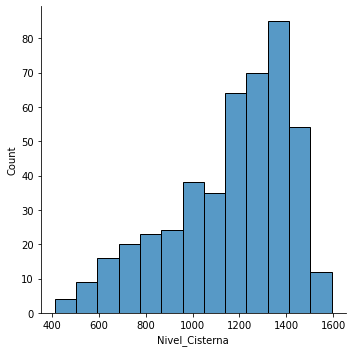

In [8]:
sbn.displot(train_df['Nivel_Cisterna']);

In [9]:
#sbn.displot(train_df['Prom_Egreso_Hora']);
# tomando datos del dataset
print(train_df['Prom_Egreso_Hora'].max())
print("humedad max", train_df['Humedad'].max())
print("humedad min", train_df['Humedad'].min())

# indice donde esta la temp max.
id_max = train_df['Temperatura'].idxmax()

print("Temperatura max", train_df['Temperatura'].max())
print("--> ", train_df.get(train_df.index == id_max))
print("Temperatura min", train_df['Temperatura'].min())

4131.0
humedad max 99.9
humedad min 14.8
Temperatura max 39.8
-->           Fecha  Ingreso_m3/h  Egreso_m3/h  Prom_Ingreso_Hora  \
377 2022-01-13        137.27       130.28             3292.0   

     Prom_Egreso_Hora  Humedad  Temperatura  Nivel_Cisterna  
377            3116.0     14.8         39.8          541.28  
Temperatura min 8.8


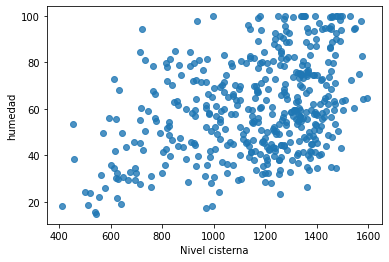

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_df.Nivel_Cisterna, y=train_df.Humedad, alpha= 0.8)
ax.set_xlabel('Nivel cisterna')
ax.set_ylabel('humedad');

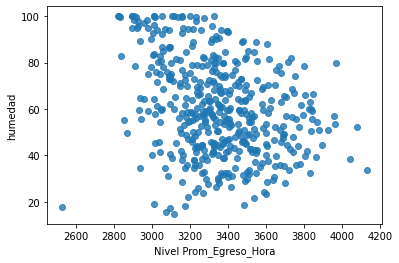

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_df.Prom_Egreso_Hora, y=train_df.Humedad, alpha= 0.8)
ax.set_xlabel('Nivel Prom_Egreso_Hora')
ax.set_ylabel('humedad');

In [12]:

train_df['periodo_y'] = pd.DatetimeIndex(train_df['Fecha']).year.astype(str)
# CREO las variables numericas de periodo_m == nro del mes.
train_df['periodo_m'] = pd.DatetimeIndex(train_df['Fecha']).month.astype(str)
# CREO las variables numericas de periodo_d == nro del dia de la semana
train_df['periodo_d'] = pd.DatetimeIndex(train_df['Fecha']).day_of_week.astype(str)
# CREO las variables numericas de periodo_dname == nombre del dia de la semana.
train_df['periodo_dname'] = pd.DatetimeIndex(train_df['Fecha']).day_name().astype(str)
# periodo año y mes
train_df['periodo'] = train_df.periodo_y.str.cat('/'+train_df.periodo_m)

train_df.head(225)

Fecha  Ingreso_m3/h  Egreso_m3/h  Prom_Ingreso_Hora  \
0   2021-01-01        137.64       127.94             3303.0   
1   2021-01-02        126.64       155.17             3039.0   
2   2021-01-03        130.55       125.14             3133.0   
3   2021-01-04        134.23       141.42             3221.0   
4   2021-01-05        137.88       134.14             3309.0   
..         ...           ...          ...                ...   
220 2021-08-09        131.53       118.56             3145.0   
221 2021-08-10        113.12       133.30             2706.0   
222 2021-08-11        133.89       131.34             3213.0   
223 2021-08-12        132.32       131.64             3176.0   
224 2021-08-13        133.63       137.03             3198.0   

     Prom_Egreso_Hora  Humedad  Temperatura  Nivel_Cisterna periodo_y  \
0              3068.0     34.8         29.6         1456.18      2021   
1              3725.0     33.6         31.7         1369.90      2021   
2              3004.0     40.3         29.4         1408.93      2021   
3              3391.0     41.4         31.9         1392.13      2021   
4              3219.0     50.1         29.8         1370.95      2021   
..                ...      ...          ...             ...       ...   
220            2837.0     82.8         11.0         1575.70      2021   
221            3192.0     54.6         11.1         1337.70      2021   
222            3144.0     56.2         12.5         1173.20      2021   
223            3151.0     51.4         13.2         1229.55      2021   
224            3281.0     54.6         13.7         1157.98      2021   

    periodo_m periodo_d periodo_dname periodo  
0           1         4        Friday  2021/1  
1           1         5      Saturday  2021/1  
2           1         6        Sunday  2021/1  
3           1         0        Monday  2021/1  
4           1         1       Tuesday  2021/1  
..        ...       ...           ...     ...  
220         8         0        Monday  2021/8  
221         8         1       Tuesday  2021/8  
222         8         2     Wednesday  2021/8  
223         8         3      Thursday  2021/8  
224         8         4        Friday  2021/8  

[225 rows x 13 columns]

In [13]:
# Convierto las variables creadas de string a entero.
train_df['periodo_y'] = train_df['periodo_y'].astype(int)
train_df['periodo_m'] = train_df['periodo_m'].astype(int)
train_df['periodo_d'] = train_df['periodo_d'].astype(int)
train_df['periodo'] = train_df['periodo'].astype('string')
train_df['periodo_dname'] = train_df['periodo_dname'].astype('string')


In [14]:
#rain_df.loc[train_df["periodo_dname"] == "Lunes", "periodo_dname"] = 'Monday'
train_df['periodo_dname'].mask(train_df['periodo_dname'] == 'Monday', 'Lunes', inplace=True)
train_df.head(5)

Fecha  Ingreso_m3/h  Egreso_m3/h  Prom_Ingreso_Hora  Prom_Egreso_Hora  \
0 2021-01-01        137.64       127.94             3303.0            3068.0   
1 2021-01-02        126.64       155.17             3039.0            3725.0   
2 2021-01-03        130.55       125.14             3133.0            3004.0   
3 2021-01-04        134.23       141.42             3221.0            3391.0   
4 2021-01-05        137.88       134.14             3309.0            3219.0   

   Humedad  Temperatura  Nivel_Cisterna  periodo_y  periodo_m  periodo_d  \
0     34.8         29.6         1456.18       2021          1          4   
1     33.6         31.7         1369.90       2021          1          5   
2     40.3         29.4         1408.93       2021          1          6   
3     41.4         31.9         1392.13       2021          1          0   
4     50.1         29.8         1370.95       2021          1          1   

  periodo_dname periodo  
0        Friday  2021/1  
1      Saturday  2021/1  
2        Sunday  2021/1  
3         Lunes  2021/1  
4       Tuesday  2021/1

In [15]:
train_df.dtypes

Fecha                datetime64[ns]
Ingreso_m3/h                float64
Egreso_m3/h                 float64
Prom_Ingreso_Hora           float64
Prom_Egreso_Hora            float64
Humedad                     float64
Temperatura                 float64
Nivel_Cisterna              float64
periodo_y                     int32
periodo_m                     int32
periodo_d                     int32
periodo_dname                string
periodo                      string
dtype: object

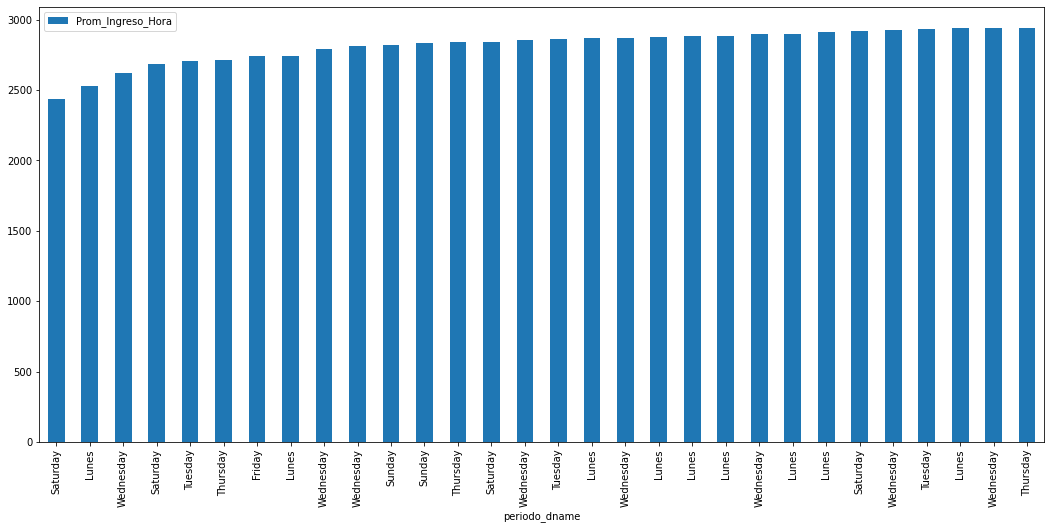

In [16]:
#f = train_df.sort_values("periodo_d", ascending=True) # ordenado por dia de la semana lunes , martes ...
f = train_df.sort_values("Prom_Ingreso_Hora", ascending=True) 
f.where((train_df.Fecha >= '2021-12-01') & (train_df.Fecha <= '2021-12-31'))
f.head(30).plot(kind="bar", x="periodo_dname", y="Prom_Ingreso_Hora")

fig = plt.gcf()
fig.set_size_inches(18,8)

In [17]:
#Layout using Template
"""

"""
template = panel.template.FastListTemplate(
    title='Dashboard Análisis de Nivel de Cisterna', 
    sidebar=[panel.pane.Markdown("# Nivel de Cisterna según Consumo de la población"), 
             panel.pane.Markdown("#### Analisis del consumo de la poblacion dela ciudad N. \
             El consumo se presenta en cantidad de m3 de acuerdo al consumo de cada cliente, donde se los categorizaron de acuerdo al consumo presentado."), 
             panel.pane.JPG('deposito.jpg',  width=150, height=150)
             ],

          main= [     
            # (panel.pane.JPG('agua_consumo.jpg', width=50, height=30),           
            panel.Row(panel.pane.JPG('agua_consumo.jpg', width=50, height=30),
                  "consumo_anual"),            
            panel.Row("####Consumo Anual agrupado por categoria:"),
            panel.Row(
                  panel.Column(panel.pane.PNG('consumos.png', width=500, height=500) ),
                  panel.Column("vals")),
            panel.Row("####Consumo Mensual por categoria:"),      
            panel.Row(
                  panel.Column(panel.pane.PNG('consumo_x_grupo_x_periodo.png', sizing_mode='scale_both') )),
            panel.Row("### Consumo anual ordeneado de Mayor a Menor"),
            panel.Row(
                  panel.pane.PNG("periodos_mayor_a_meno.png"))
          ],
    accent_base_color="#3728d8",
    header_background="#3728d8",
)
template.show()
template.servable();

Launching server at http://localhost:59246


In [18]:
# del dataset con el que fui trabajando solo dejo los datos que mas me interesan para armar el modelo predictivo.
traindf = train_df[['Ingreso_m3/h','Egreso_m3/h','Prom_Ingreso_Hora','Prom_Egreso_Hora','Humedad','Temperatura','Nivel_Cisterna','periodo_m','periodo_d']]
#traindf.head(5)
display(traindf.corr(method='pearson'))

Ingreso_m3/h  Egreso_m3/h  Prom_Ingreso_Hora  \
Ingreso_m3/h           1.000000     0.140595           0.460813   
Egreso_m3/h            0.140595     1.000000           0.314101   
Prom_Ingreso_Hora      0.460813     0.314101           1.000000   
Prom_Egreso_Hora       0.133278     0.913725           0.308524   
Humedad               -0.140907    -0.308033          -0.220344   
Temperatura            0.084296     0.143546           0.104002   
Nivel_Cisterna        -0.064484    -0.232748          -0.205151   
periodo_m              0.078331     0.056420           0.006126   
periodo_d             -0.002266     0.059129           0.055753   

                   Prom_Egreso_Hora   Humedad  Temperatura  Nivel_Cisterna  \
Ingreso_m3/h               0.133278 -0.140907     0.084296       -0.064484   
Egreso_m3/h                0.913725 -0.308033     0.143546       -0.232748   
Prom_Ingreso_Hora          0.308524 -0.220344     0.104002       -0.205151   
Prom_Egreso_Hora           1.000000 -0.313302     0.130745       -0.222337   
Humedad                   -0.313302  1.000000    -0.405984        0.391426   
Temperatura                0.130745 -0.405984     1.000000       -0.124657   
Nivel_Cisterna            -0.222337  0.391426    -0.124657        1.000000   
periodo_m                  0.060505 -0.245035    -0.198682       -0.282040   
periodo_d                  0.021010 -0.033821    -0.001131       -0.116331   

                   periodo_m  periodo_d  
Ingreso_m3/h        0.078331  -0.002266  
Egreso_m3/h         0.056420   0.059129  
Prom_Ingreso_Hora   0.006126   0.055753  
Prom_Egreso_Hora    0.060505   0.021010  
Humedad            -0.245035  -0.033821  
Temperatura        -0.198682  -0.001131  
Nivel_Cisterna     -0.282040  -0.116331  
periodo_m           1.000000  -0.006729  
periodo_d          -0.006729   1.000000

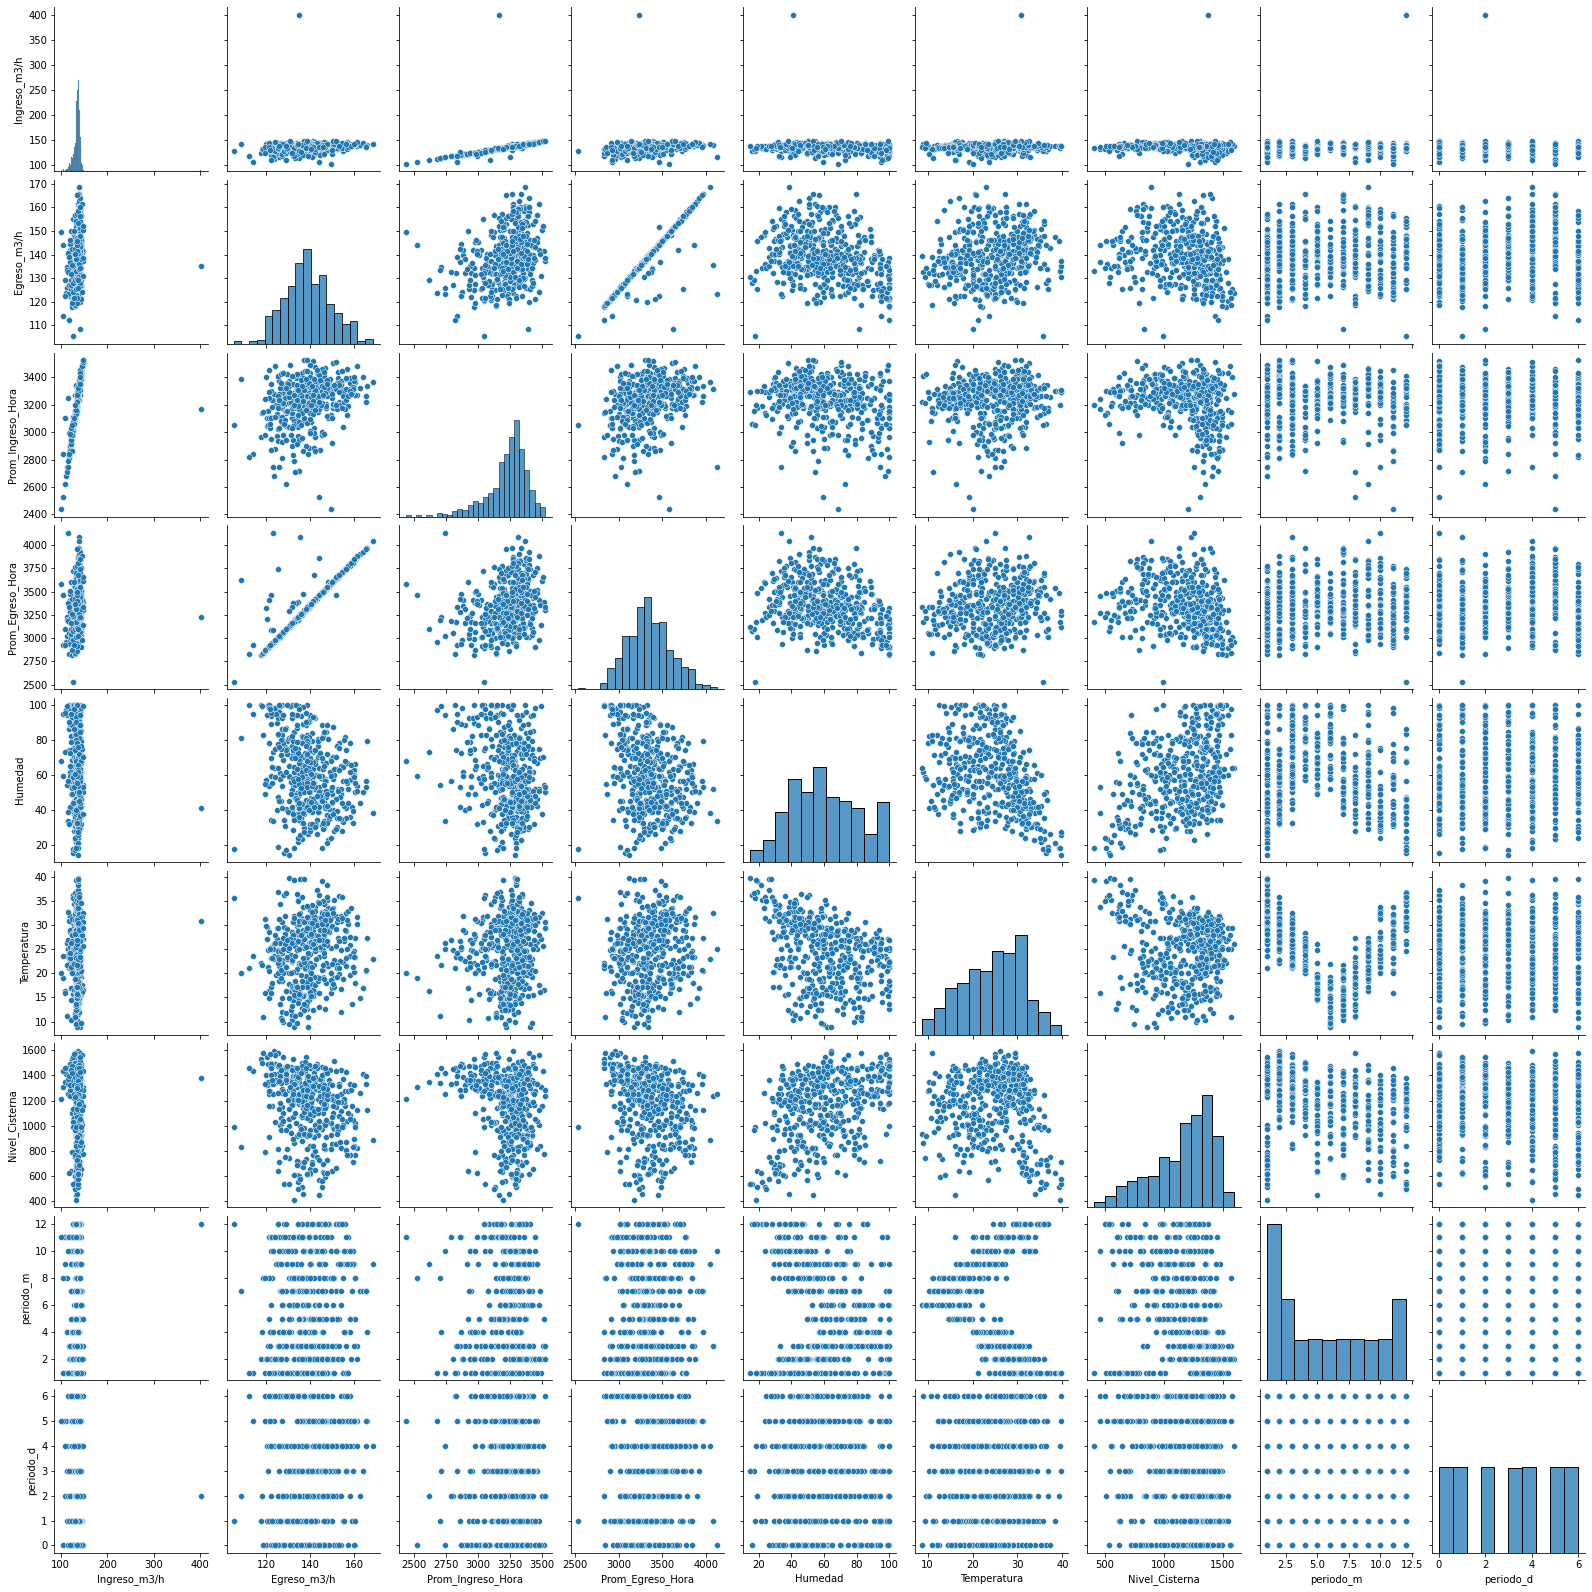

In [19]:
sbn.pairplot(traindf)
plt.show()

In [20]:
display(traindf[traindf.columns[1:]].corr()['Nivel_Cisterna'][:].sort_values(ascending=False).to_frame())
display(traindf[traindf.columns[1:]].corr()['Prom_Egreso_Hora'][:].sort_values(ascending=False).to_frame())
display(traindf[traindf.columns[1:]].corr()['Temperatura'][:].sort_values(ascending=False).to_frame())
display(traindf[traindf.columns[1:]].corr()['Humedad'][:].sort_values(ascending=False).to_frame())

Nivel_Cisterna
Nivel_Cisterna           1.000000
Humedad                  0.391426
periodo_d               -0.116331
Temperatura             -0.124657
Prom_Ingreso_Hora       -0.205151
Prom_Egreso_Hora        -0.222337
Egreso_m3/h             -0.232748
periodo_m               -0.282040

Prom_Egreso_Hora
Prom_Egreso_Hora           1.000000
Egreso_m3/h                0.913725
Prom_Ingreso_Hora          0.308524
Temperatura                0.130745
periodo_m                  0.060505
periodo_d                  0.021010
Nivel_Cisterna            -0.222337
Humedad                   -0.313302

Temperatura
Temperatura           1.000000
Egreso_m3/h           0.143546
Prom_Egreso_Hora      0.130745
Prom_Ingreso_Hora     0.104002
periodo_d            -0.001131
Nivel_Cisterna       -0.124657
periodo_m            -0.198682
Humedad              -0.405984

Humedad
Humedad            1.000000
Nivel_Cisterna     0.391426
periodo_d         -0.033821
Prom_Ingreso_Hora -0.220344
periodo_m         -0.245035
Egreso_m3/h       -0.308033
Prom_Egreso_Hora  -0.313302
Temperatura       -0.405984

<AxesSubplot:>

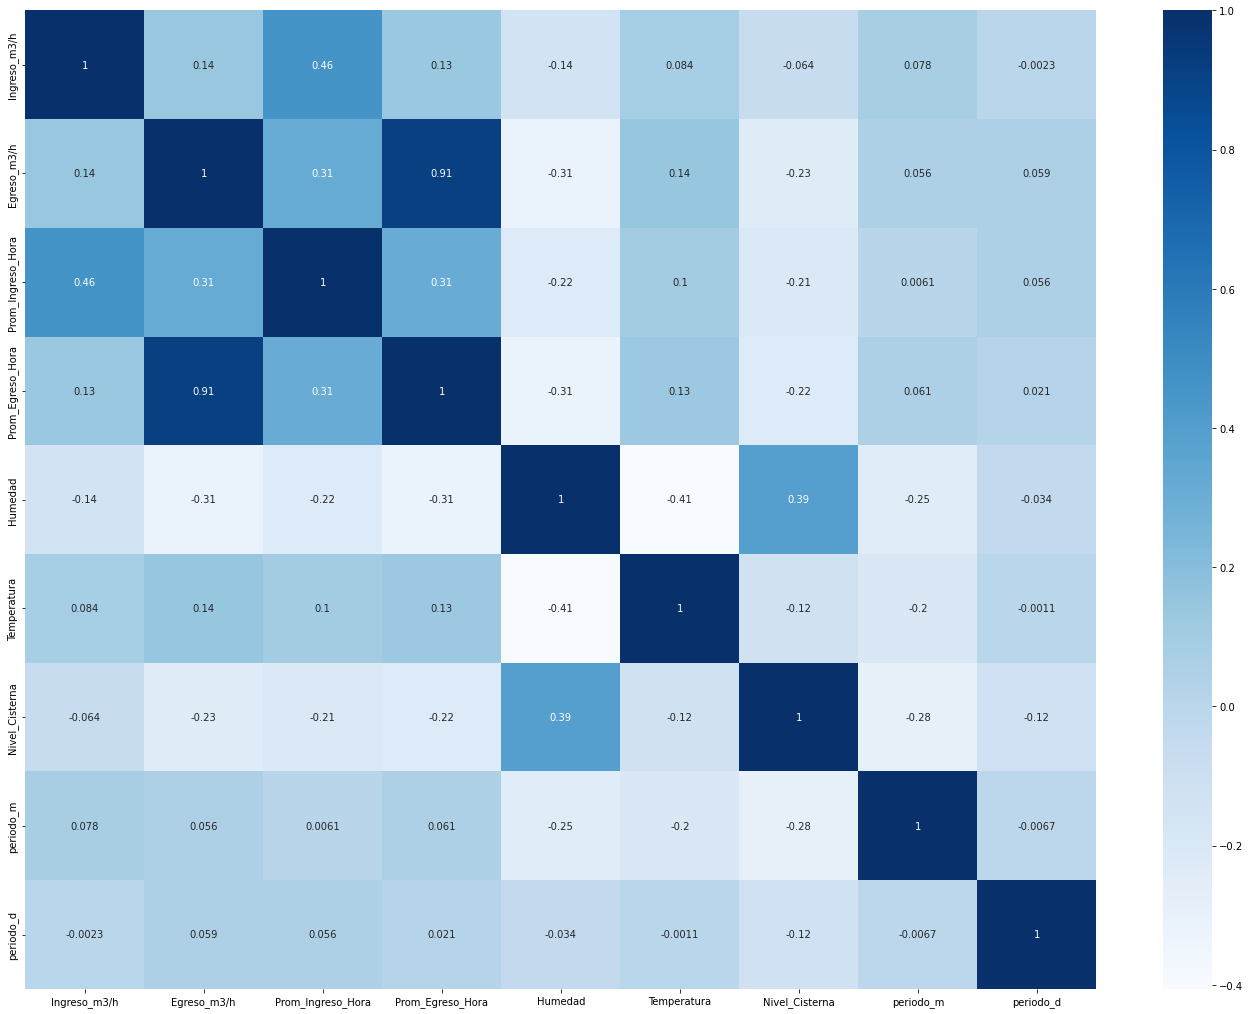

In [21]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = traindf.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(24,18))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color,
# en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la 
# parte central de la gráfica
#ax = sbn.heatmap(corr,annot=True,mask = mask) # cmap='viridis'
ax = sbn.heatmap(corr,annot=True, cmap="Blues") # cmap='viridis'
ax

In [22]:
"""
# Randomforest
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = traindf.drop(["Nivel_Cisterna"],axis = 1)

# y es nuestra variable dependiente
y = traindf.Nivel_Cisterna

#  75% entrenamiento y 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=4, test_size=0.25)
# Creaamos el modelo y configuramos el número de estimadores (árboles de decisión))
#BA_model = rfc(n_estimators = 23, random_state = 2000,  min_samples_leaf = 10)
# Entrenando ..
print("trainnig ..")
BA_model.fit(X_train, y_train)
print("OK")

## Matriz de Confusión
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()
""" 

'\n# Randomforest\n# Dividimos los datos en entrenamiento y prueba\nfrom sklearn.model_selection import train_test_split\n# X son nuestras variables independientes\nX = traindf.drop(["Nivel_Cisterna"],axis = 1)\n\n# y es nuestra variable dependiente\ny = traindf.Nivel_Cisterna\n\n#  75% entrenamiento y 25% de datos para test\nX_train, X_test, y_train, y_test = train_test_split(X, y,random_state=4, test_size=0.25)\n# Creaamos el modelo y configuramos el número de estimadores (árboles de decisión))\n#BA_model = rfc(n_estimators = 23, random_state = 2000,  min_samples_leaf = 10)\n# Entrenando ..\nprint("trainnig ..")\nBA_model.fit(X_train, y_train)\nprint("OK")\n\n## Matriz de Confusión\nfrom mlxtend.plotting import plot_confusion_matrix\nfrom sklearn.metrics import confusion_matrix\n\n# Predicción del modelo usando los datos de prueba\ny_pred = BA_model.predict(X_test)\nmatriz = confusion_matrix(y_test,y_pred)\n\nplot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)\np

In [23]:
# regresion lineal multiple

"""
https://stackoverflow.com/questions/49147774/what-is-random-state-in-sklearn-model-selection-train-test-split-example
random_state : int, RandomState instance or None, default=None
    Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>.
    random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.
    If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.
"""

from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
#X = traindf.drop(["Nivel_Cisterna", "periodo_m","periodo_d", "Ingreso_m3/h", "Egreso_m3/h", "Prom_Ingreso_Hora","Prom_Egreso_Hora" ],axis = 1)
# variante 2 
X = traindf.drop(["Nivel_Cisterna" ],axis = 1)


# Y es nuestra variable dependiente
Y = traindf.Nivel_Cisterna
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [24]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

#print(mlr.coef_)

1956.2217903037895


[('Ingreso_m3/h', 1.2034521031510639),
 ('Egreso_m3/h', -2.327618020016073),
 ('Prom_Ingreso_Hora', -0.20976655410103762),
 ('Prom_Egreso_Hora', -0.009224446998418623),
 ('Humedad', 3.5658911558634054),
 ('Temperatura', -1.2107619627142074),
 ('periodo_m', -13.819772602590962),
 ('periodo_d', -10.535797530811154)]

In [26]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [27]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 997.69399878 1157.46329564 1100.0886158  1145.43656761 1154.1309763
 1149.50935131 1139.41471812 1200.0790665  1100.01271114 1262.53604563
 1158.03176469 1010.75701529 1079.63490697 1120.95150382 1166.3316756
 1260.20997816 1143.6120239  1198.21382301 1163.41843115 1376.24055572
 1197.23498022  930.28749046  977.81336116 1287.41506971 1052.19967504
 1177.13525535 1139.9709173  1238.61162383 1129.51889955 1398.39113152
 1156.47667328 1282.9858653   932.19893183 1361.57308343 1163.60893221
 1191.23735634  996.74477535 1052.4849216   932.37471781  994.60911995
 1425.37397885 1024.92700014 1090.94593188 1011.10787782 1222.89690506
  987.59055431  998.17807039 1322.15591209 1199.20216318 1083.88929092
 1321.13821325  950.74417148 1274.61431099 1114.79197632 1027.21578439
 1144.39763454 1390.43705108 1229.25247796  994.41716185 1099.23451905
 1189.45461968 1100.94656271  957.27278131 1193.01209351 1194.15772731
 1224.227948    981.95397217 1271.28737968 1103.515124

In [28]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

Actual value  Predicted value
330        924.70       997.693999
416       1371.13      1157.463296
320       1286.60      1100.088616
425       1481.90      1145.436568
311       1274.53      1154.130976
..            ...              ...
288       1260.00       999.338837
21        1225.00      1176.332473
272       1039.33      1057.187559
19        1237.25      1210.080367
96        1269.45      1296.816600

[91 rows x 2 columns]

In [ ]:
#Predict 137.64	127.94	3303.0	3068.0	34.8	29.6	

p = mlr.predict([[34.8,29.6]])
print("nivel de cisterna: ", p)

In [31]:
# print el R-squared value
#print('R squared value of the model: {:.2f}'.format(mlr.score(X,Y)))


R squared value of the model: 0.23


In [30]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Error 2 medio:', metrics.r2_score(y_test, y_pred_mlr))


Mean Absolute Error: 178.15555724422367
Mean Square Error: 47014.77477900387
Root Mean Square Error: 216.82890669604888
Error 2 medio: 0.2534530064196677
